In [268]:
import pandas as pd
import numpy as np
import seaborn as sns

In [269]:
df_path = "../overall-per-character-speech-postpro6.tsv"

In [270]:
df = pd.read_csv(df_path)

In [271]:
df.head()

,speaker,gender,author,date,date_type,social_class,job,job_category,segment_number,play_short_name,genre,text
0,Ne Pierrot,M,August Lustig,1896.0,printed,NaN,NaN,NaN,0,lustig-am-letzte-maskebal,comedy,"'s isch Zit glaüb, liewer Domino,|||Ass mir uf..."
1,ne Domino,M,August Lustig,1896.0,printed,NaN,NaN,NaN,1,lustig-am-letzte-maskebal,comedy,Also bisch Dü g'hirothe denn?
2,Ne Pierrot,M,August Lustig,1896.0,printed,NaN,NaN,NaN,2,lustig-am-letzte-maskebal,comedy,"He, leider jo!... wenn ich sag « leider »,|||S..."
3,ne Domino,M,August Lustig,1896.0,printed,NaN,NaN,NaN,3,lustig-am-letzte-maskebal,comedy,"Das isch nitt mi!|||Das kenn ich nitt, was kun..."
4,Ne Pierrot,M,August Lustig,1896.0,printed,NaN,NaN,NaN,4,lustig-am-letzte-maskebal,comedy,"So hat's halt ebber schint's vergesse,|||Wo vo..."


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28047 entries, 0 to 28046
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   speaker          28047 non-null  object 
 1   gender           28047 non-null  object 
 2   author           28047 non-null  object 
 3   date             27939 non-null  float64
 4   date_type        28047 non-null  object 
 5   social_class     10970 non-null  object 
 6   job              13387 non-null  object 
 7   job_category     13387 non-null  object 
 8   segment_number   28047 non-null  int64  
 9   play_short_name  28047 non-null  object 
 10  genre            28047 non-null  object 
 11  text             27877 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.6+ MB


In [273]:
df.gender.value_counts(dropna=False)

M              19049
F               8498
U                313
sex_unknown      111
B                 76
Name: gender, dtype: int64

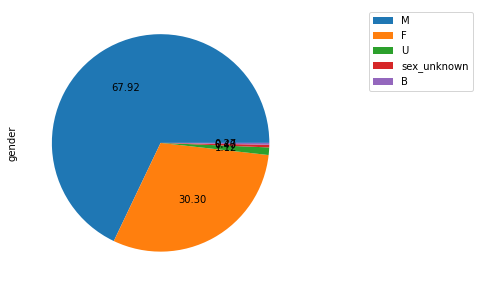

In [274]:
df.gender.value_counts().plot(kind='pie', figsize=(10,5), labels=None, autopct="%.2f").legend(loc='upper left', labels=df.gender.value_counts().index, bbox_to_anchor=(1.25, 1))

In [275]:
df.job_category.value_counts(dropna=False)

NaN                                   14660
professionals_scientific_technical     2390
service_and_sales                      2356
elementary_professions                 1924
government_executive_officials         1390
crafts                                 1288
rentiers                               1118
intermediate_professionals              874
agriculture                             723
industry_and_transportation             716
military                                237
associative_world                       131
job_category_unknown                    111
clergy                                   92
unknown                                  37
Name: job_category, dtype: int64

In [276]:
sum(df.job_category.value_counts()), sum(df.job_category.value_counts(dropna=False))

(13387, 28047)

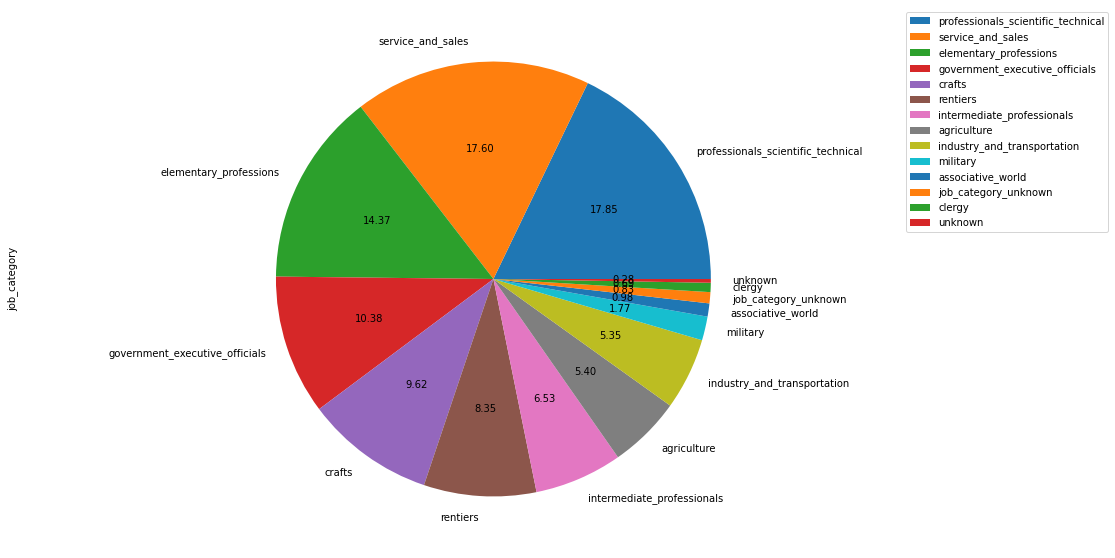

In [277]:
job_pie = df.job_category.value_counts().plot.pie(figsize=(20,10), autopct="%.2f")
job_pie.set_ylabel("job_category", labelpad=200)
job_pie.legend(loc='upper left', bbox_to_anchor=(1.25, 1))

In [278]:
df.social_class.value_counts(dropna=False)

NaN                     17077
lower_middle_class       4450
lower_class              2440
upper_class              2009
upper_middle_class       1868
social_class_unknown      111
middle_class               92
Name: social_class, dtype: int64

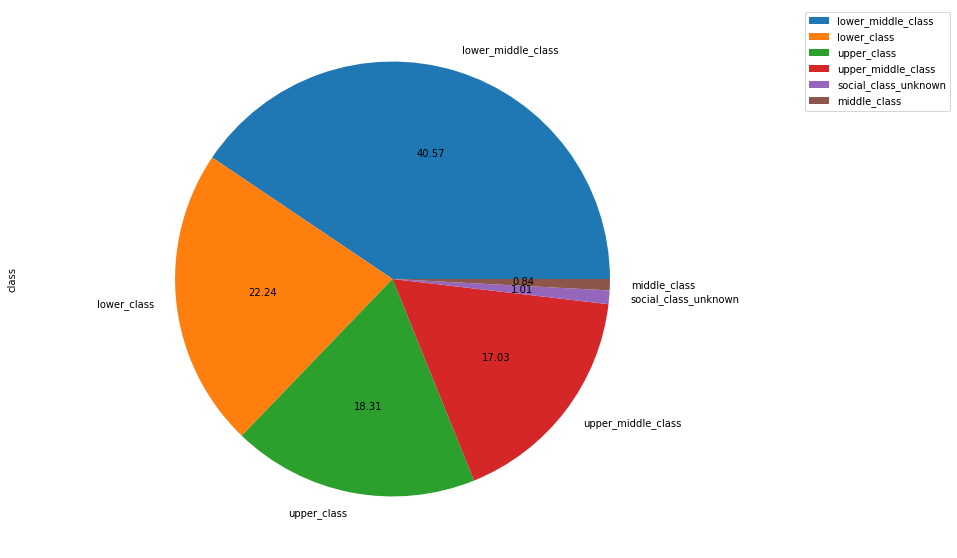

In [279]:
class_pie = df.social_class.value_counts().plot.pie(figsize=(20,10), autopct="%.2f")
class_pie.set_ylabel("class", labelpad=100)
class_pie.legend(loc='upper left', bbox_to_anchor=(1.25, 1))

In [280]:
df.genre.value_counts(dropna=False)

comedy         18446
volksstueck     4740
drama           2600
tale            2261
Name: genre, dtype: int64

In [281]:
from itertools import chain

In [282]:
gender_by_genre = pd.crosstab(df.genre, df.gender)
gender_by_genre_row_norm = pd.crosstab(df.genre, df.gender, normalize='index')

In [283]:
genre_no_norm_labels = list(chain.from_iterable(gender_by_genre.values.tolist()))
genre_norm_by_rows_labels = list(chain.from_iterable(gender_by_genre_row_norm.values.tolist()))
genre_count_and_norm = list(zip(genre_no_norm_labels, genre_norm_by_rows_labels))
labels_genre_gender = [f"{x:.0f}\n{y:.2f}" for x, y in genre_count_and_norm]
annots = np.asarray(labels_genre_gender).reshape(4, 5)

<AxesSubplot:xlabel='gender', ylabel='genre'>

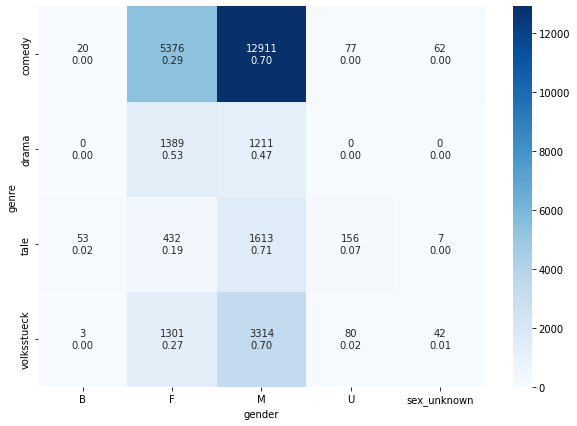

In [284]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(pd.crosstab(df.genre, df.gender), annot=annots, fmt="", cmap="Blues")

In [285]:
#sns.heatmap(pd.crosstab(df.genre, df.social_class), annot=True, fmt=".0f", cmap="Oranges")

<AxesSubplot:xlabel='social_class', ylabel='genre'>

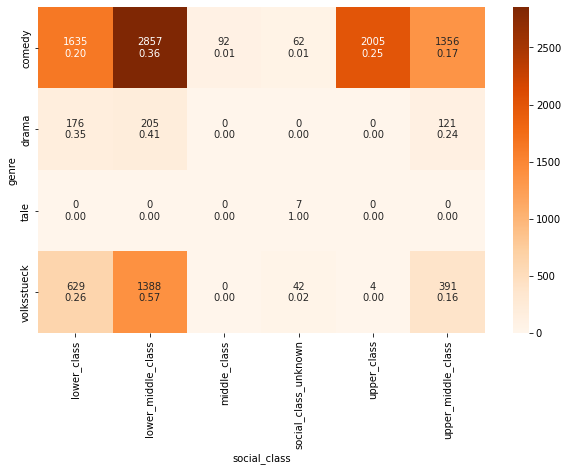

In [286]:
soc_class_by_genre = pd.crosstab(df.genre, df.social_class)
soc_class_by_genre_row_norm = pd.crosstab(df.genre, df.social_class, normalize='index')

soc_class_no_norm_labels = list(chain.from_iterable(soc_class_by_genre.values.tolist()))
soc_class_norm_by_rows_labels = list(chain.from_iterable(soc_class_by_genre_row_norm.values.tolist()))
soc_class_count_and_norm = list(zip(soc_class_no_norm_labels, soc_class_norm_by_rows_labels))
labels_soc_class_gender = [f"{x:.0f}\n{y:.2f}" for x, y in soc_class_count_and_norm]
annots_soc_class = np.asarray(labels_soc_class_gender).reshape(4, 6)


plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(df.genre, df.social_class), annot=annots_soc_class, fmt="", cmap="Oranges")

In [287]:
#sns.heatmap(pd.crosstab(df.job_category, df.genre), annot=True, fmt=".0f", cmap="Purples")

<AxesSubplot:xlabel='genre', ylabel='job_category'>

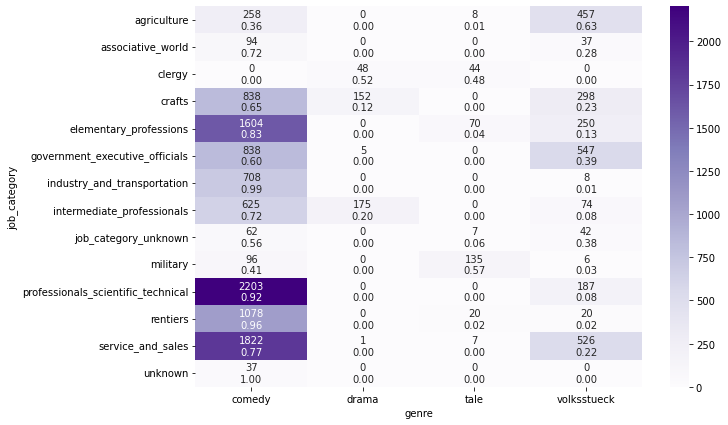

In [288]:
job_cat_by_genre = pd.crosstab(df.job_category, df.genre)
job_cat_by_genre_row_norm = pd.crosstab(df.job_category, df.genre, normalize='index')

job_cat_no_norm_labels = list(chain.from_iterable(job_cat_by_genre.values.tolist()))
job_cat_norm_by_rows_labels = list(chain.from_iterable(job_cat_by_genre_row_norm.values.tolist()))
job_cat_count_and_norm = list(zip(job_cat_no_norm_labels, job_cat_norm_by_rows_labels))
labels_job_cat_gender = [f"{x}\n{y:.2f}" for x, y in job_cat_count_and_norm]
annots_job_cat = np.asarray(labels_job_cat_gender).reshape(14, 4)


plt.figure(figsize=(10,7))
sns.heatmap(pd.crosstab(df.job_category, df.genre), annot=annots_job_cat, fmt="", cmap="Purples")